In [1]:
%%writefile requirements.txt
pandas==1.2.3
numpy==1.24.3
matplotlib==3.7.1
seaborn==0.12.2
black==22.3.0
sklearn==1.3.0

Overwriting requirements.txt


In [25]:
import pandas as pd 
import numpy
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

In [4]:
!pip install python-lsp-black

In [5]:
!type requirements.txt

pandas==1.2.3
numpy==1.24.3
matplotlib==3.7.1
seaborn==0.12.2
black==22.3.0
sklearn==1.3.0


In [6]:
!black "C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\Analysewerkzeuge.Präsentation.csv"

reformatted C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\Analysewerkzeuge.Präsentation.csv

All done! \u2728 \U0001f370 \u2728
1 file reformatted.


In [7]:
df = pd.read_csv('movies.csv',delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.3+ KB


In [8]:
#Entfernen der fehlenden Daten
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1965 non-null   object 
 1   Rating             1965 non-null   float64
 2   Year               1965 non-null   int64  
 3   Month              1965 non-null   object 
 4   Certificate        1965 non-null   object 
 5   Runtime            1965 non-null   object 
 6   Directors          1965 non-null   object 
 7   Stars              1965 non-null   object 
 8   Genre              1965 non-null   object 
 9   Filming_location   1965 non-null   object 
 10  Budget             1965 non-null   object 
 11  Income             1965 non-null   object 
 12  Country_of_origin  1965 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 214.9+ KB


In [9]:
#erste 5 Zeilen des Datensatzes anzeigen 
num_rows = 5
df.head(num_rows)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


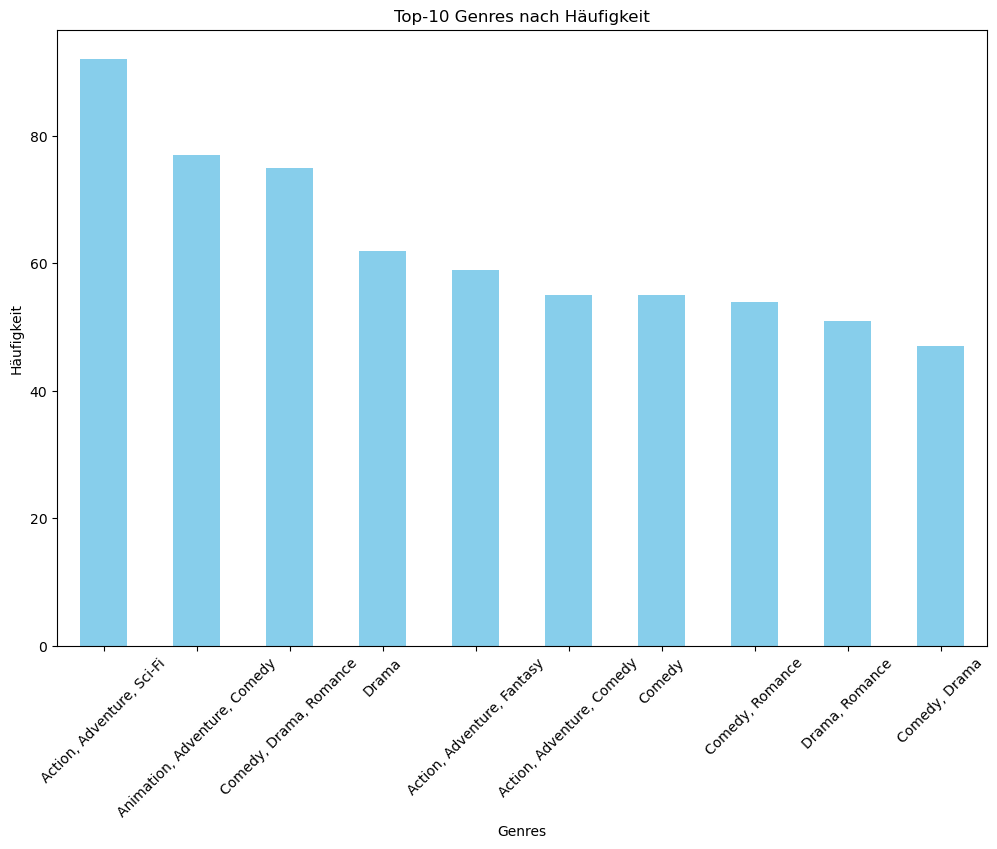

In [10]:
import matplotlib.pyplot as plt

# Anzahl der Top-Genres, die angezeigt werden sollen
top_n = 10

# Genres nach Häufigkeit sortieren und die Top-N auswählen
genre_counts = df['Genre'].value_counts().nlargest(top_n)

# Diagramm
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')

# Titel und Beschriftungen
plt.title(f'Top-{top_n} Genres nach Häufigkeit')
plt.xlabel('Genres')
plt.ylabel('Häufigkeit')

# x-Achse mit Genres eindeutig beschriften
plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45)

# Diagramm wird angezeigt
plt.show()

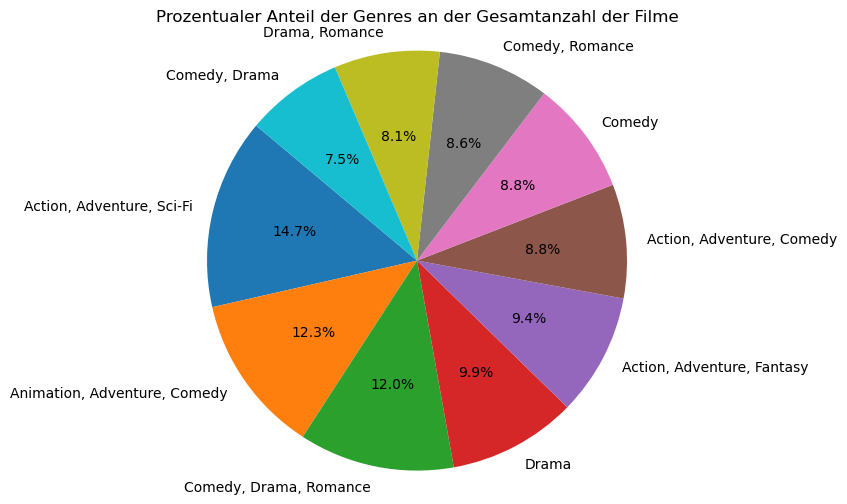

In [11]:
# Anzahl der Top-Genres, die angezeigt werden sollen
top_n = 10

# Genres nach Häufigkeit sortieren und die Top-10 auswählen
genre_counts = df['Genre'].value_counts().nlargest(top_n)


#Tortendiagramm zur besseren Visualisierung erstellen 
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Prozentualer Anteil der Genres an der Gesamtanzahl der Filme')
plt.axis('equal')  # sorgt dafür, dass das Diagramm rund ist
plt.show()

In [12]:
# Gruppiert die Daten nach Jahr und Genre und zählt die Häufigkeit
genre_counts_by_year = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# Findet für jedes Jahr das Genre mit der höchsten Anzahl von Filmen
top_genre_by_year = genre_counts_by_year.loc[genre_counts_by_year.groupby('Year')['Count'].idxmax()]

# Erstellt ein DataFrame, das nur das Jahr, das Genre und die Anzahl der Filme enthält
result_df = top_genre_by_year[['Year', 'Genre', 'Count']]

# Zeigt das Ergebnis an
print(result_df)

      Year                         Genre  Count
0     2003     Action, Adventure, Comedy      6
86    2004        Comedy, Drama, Romance      9
149   2005        Comedy, Drama, Romance      6
190   2006     Adventure, Comedy, Family      5
262   2007  Animation, Adventure, Comedy      7
334   2008        Comedy, Drama, Romance      6
383   2009  Animation, Adventure, Comedy      6
453   2010        Comedy, Drama, Romance      7
515   2011               Comedy, Romance      7
538   2012     Action, Adventure, Sci-Fi      6
595   2013     Action, Adventure, Sci-Fi      9
651   2014     Action, Adventure, Sci-Fi      7
712   2015     Action, Adventure, Sci-Fi     11
768   2016     Action, Adventure, Sci-Fi      8
818   2017    Action, Adventure, Fantasy      9
877   2018     Action, Adventure, Sci-Fi     10
977   2019                Drama, Romance      6
1011  2020                 Comedy, Drama      6
1091  2021                         Drama      6
1125  2022  Animation, Adventure, Comedy

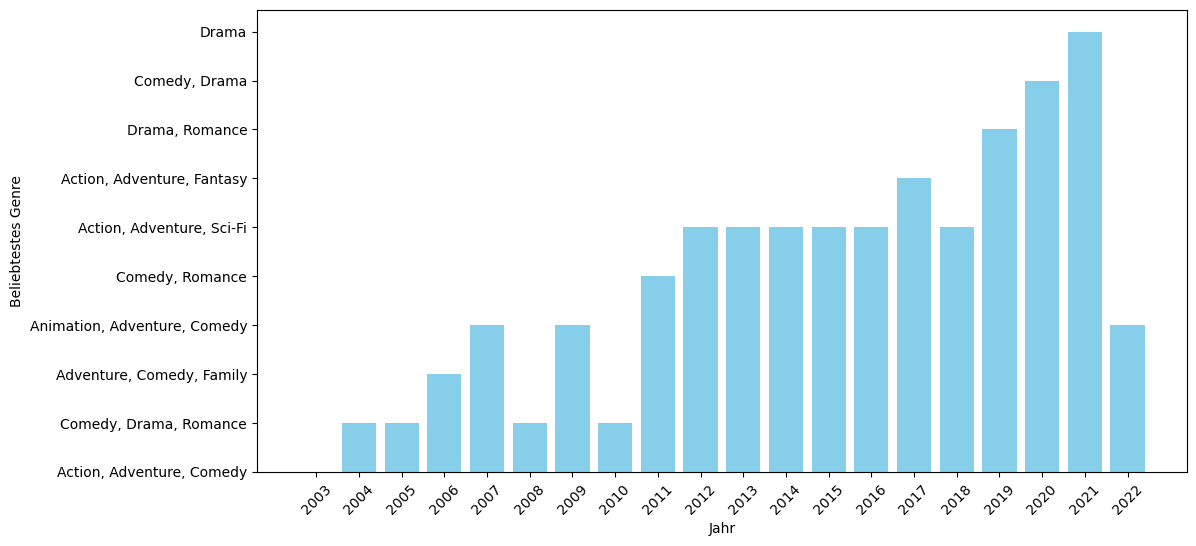

In [13]:
# Findet das beliebteste Genre für jedes Jahr
top_genre_by_year = result_df.groupby('Year')['Genre'].first().reset_index()

# Erstellt das Balkendiagramm
plt.figure(figsize=(12, 6))
plt.bar(top_genre_by_year['Year'], top_genre_by_year['Genre'], color='skyblue')

# Beschriftungen für x-Achse und y-Achse
plt.xlabel('Jahr')
plt.ylabel('Beliebtestes Genre')

#Einstellungen für x-Achsenbeschriftungen (ganze Zahlen)
plt.xticks(range(2003, 2023), rotation=45)  # 2003 bis 2022

# Diagramm anzeigen
plt.xticks(rotation=45)  # Drehung der x-Achsenbeschriftung für bessere Lesbarkeit
plt.show()

In [14]:
# Gruppiert die Daten nach 'Genre' und berechne den Durchschnitt der 'Rating'-Werte
# Sortiert die Ergebnisse in absteigender Reihenfolge nach dem Durchschnittsrating
genre_ratings = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Wählt das Genre mit dem höchsten Durchschnittsrating aus
best_genre = genre_ratings.idxmax()
best_genre_rating = genre_ratings.max()

# Gibt das Ergebnis aus
print(f"Das Genre mit dem höchsten Durchschnittsrating ist '{best_genre}' mit einem Rating von {best_genre_rating:.2f}")

Das Genre mit dem höchsten Durchschnittsrating ist 'Adventure, Drama, War' mit einem Rating von 8.30


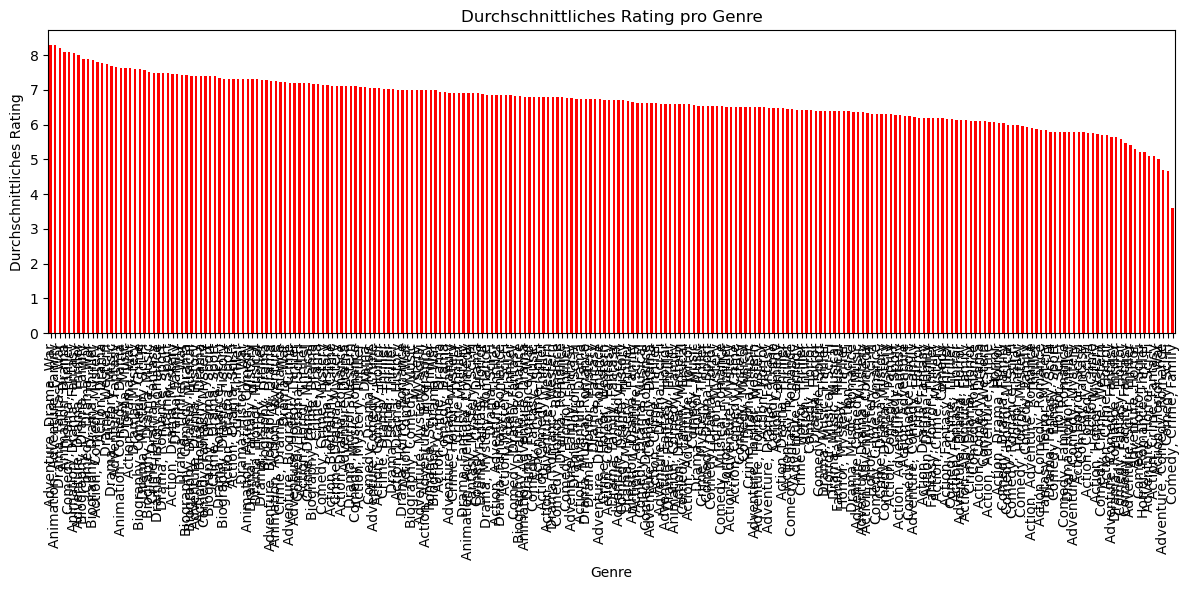

In [15]:
# Gruppiert die Daten nach 'Genre' und berechnet den Durchschnitt der 'Rating'-Werte
genre_ratings = df.groupby('Genre')['Rating'].mean()

# Erstellt ein Balkendiagramm, um die durchschnittlichen Bewertungen für jedes Genre darzustellen
plt.figure(figsize=(12, 6))
genre_ratings.sort_values(ascending=False).plot(kind='bar', color='red')

# Beschriftungen für x-Achse und y-Achse
plt.xlabel('Genre')
plt.ylabel('Durchschnittliches Rating')
plt.title('Durchschnittliches Rating pro Genre')

# Diagramm anzeigen
plt.xticks(rotation=90)  # Drehung der x-Achsenbeschriftung für bessere Lesbarkeit
plt.tight_layout()  # Verbessert die Layoutanpassung für Beschriftungen
plt.show()

#nicht lesbar deshalb werde ich mich auf die Top 10 Genres beschränken

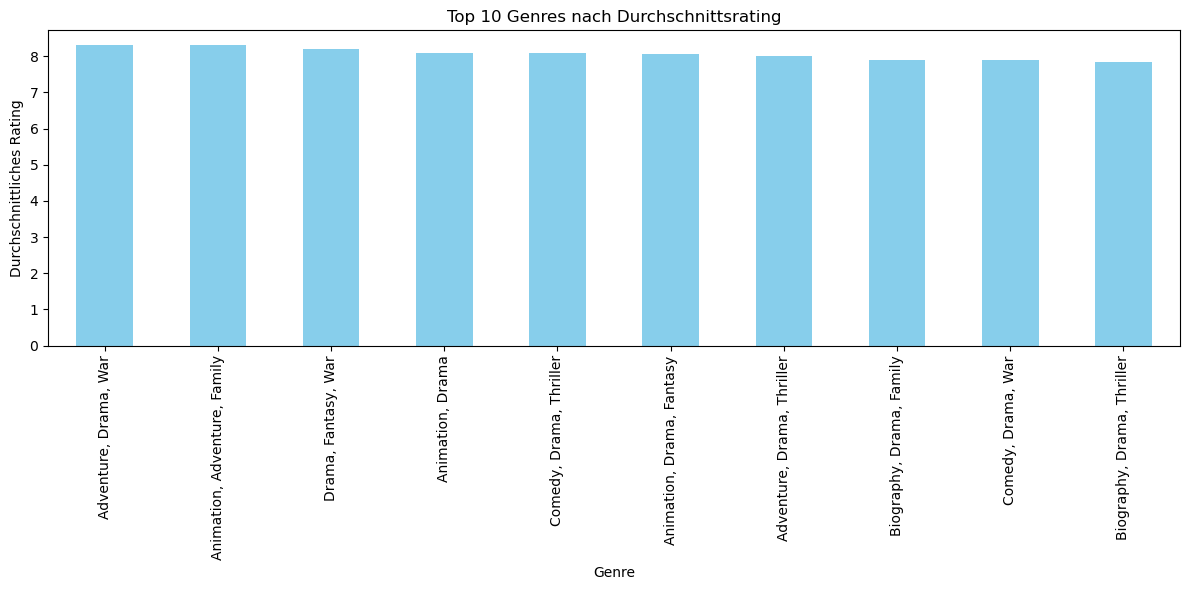

In [16]:
# Gruppiert die Daten nach 'Genre' und berechnet den Durchschnitt der 'Rating'-Werte
genre_ratings = df.groupby('Genre')['Rating'].mean()

# Zeigt nur die Top 10 Genres an 
top_10_genre_ratings = genre_ratings.nlargest(10)

# Erstellt ein Balkendiagramm, um die Top 10 Genres nach Durchschnittsrating darzustellen
plt.figure(figsize=(12, 6))
top_10_genre_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Beschriftungen für x-Achse und y-Achse
plt.xlabel('Genre')
plt.ylabel('Durchschnittliches Rating')
plt.title('Top 10 Genres nach Durchschnittsrating')

# Diagramm anzeigen
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

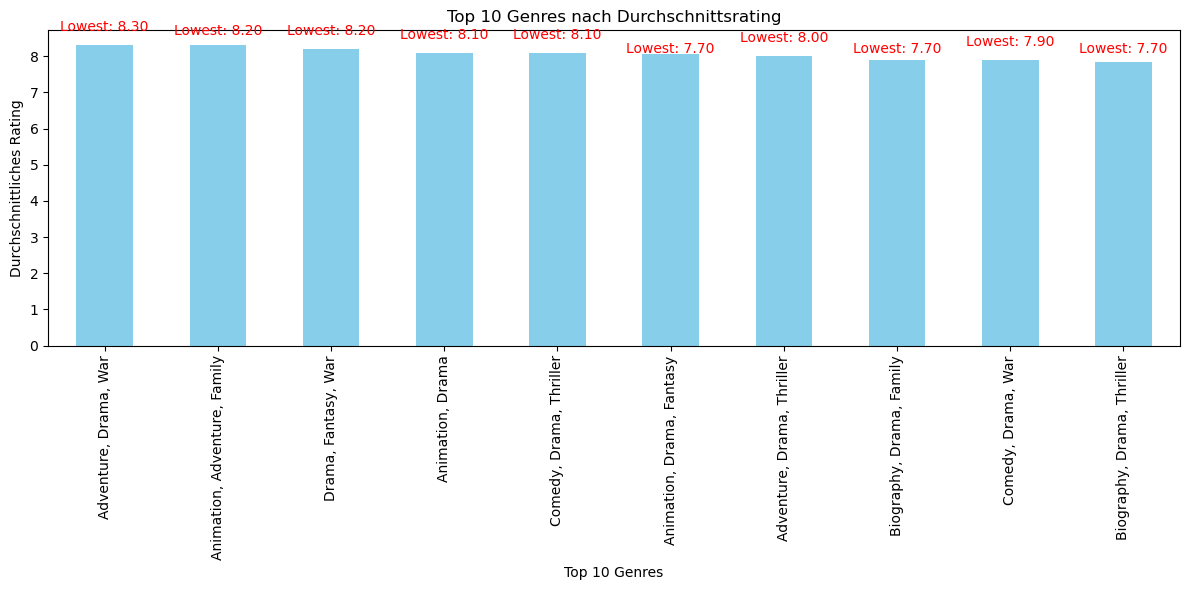

In [17]:
# Gruppiert die Daten nach 'Genre' und berechnet den Durchschnitt der 'Rating'-Werte
genre_ratings = df.groupby('Genre')['Rating'].mean()

# Zeigt nur die Top 10 Genres an 
top_10_genre_ratings = genre_ratings.nlargest(10)

# Erstellt ein Balkendiagramm, um die niedrigsten Bewertungen in den Top 10 Genres darzustellen
plt.figure(figsize=(12, 6))
top_10_genre_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Beschriftungen für x-Achse und y-Achse
plt.xlabel('Top 10 Genres')
plt.ylabel('Durchschnittliches Rating')
plt.title('Top 10 Genres nach Durchschnittsrating')

# Fügt die niedrigsten Bewertungen hinzu
for i, genre in enumerate(top_10_genre_ratings.index):
    lowest_rating = df[df['Genre'] == genre]['Rating'].min()
    plt.annotate(f'Lowest: {lowest_rating:.2f}', (i, lowest_rating), textcoords="offset points", xytext=(0,10), ha='center', color='red')

# Benennt die x-Achse entsprechend den Genre-Namen
plt.xticks(range(len(top_10_genre_ratings.index)), top_10_genre_ratings.index, rotation=90)

plt.tight_layout()
plt.show()

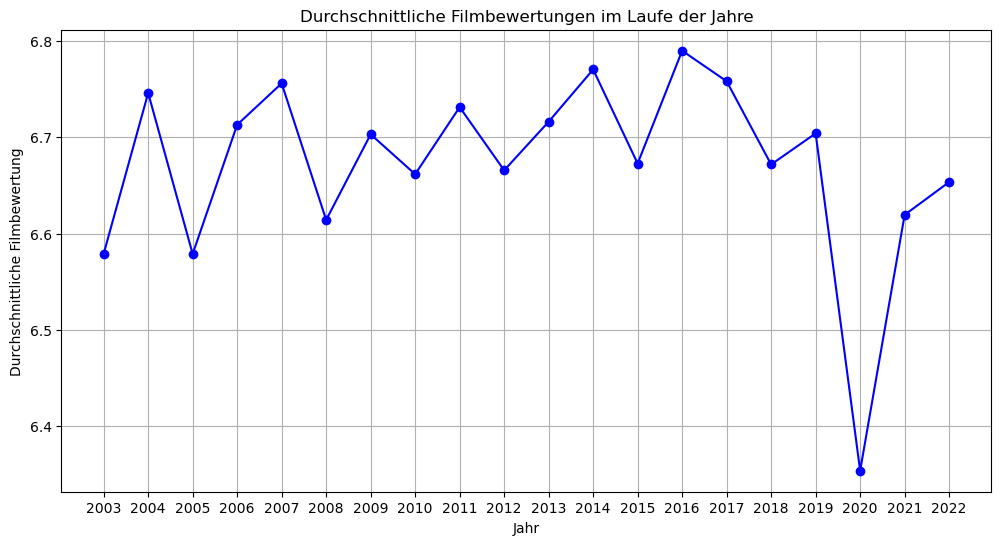

In [18]:
# Gruppiert den DataFrame nach dem Erscheinungsjahr und berechne den Durchschnitt der Filmbewertungen
average_ratings_by_year = df.groupby('Year')['Rating'].mean()

# Plot
plt.figure(figsize=(12, 6))
average_ratings_by_year.plot(marker='o', linestyle='-', color='b')
plt.title('Durchschnittliche Filmbewertungen im Laufe der Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Filmbewertung')
plt.grid(True)

plt.xticks(range(int(min(average_ratings_by_year.index)), int(max(average_ratings_by_year.index)) + 1))

plt.show()

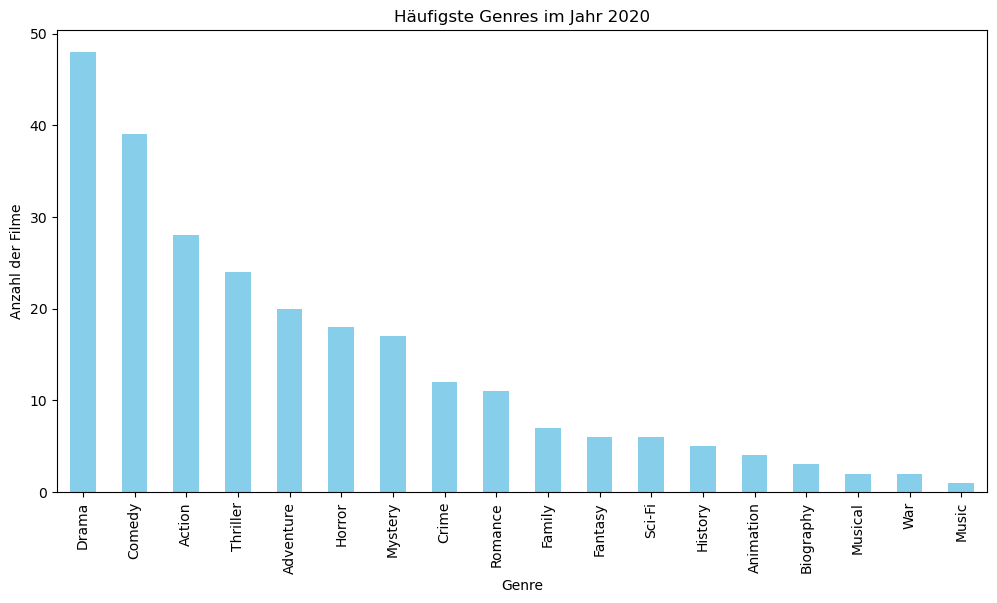

In [19]:
genres_2020 = df[df['Year'] == 2020]['Genre'].str.split(', ').explode()
top_genres_2020 = genres_2020.value_counts()

# Plot der häufigsten Genres im Jahr 2020
plt.figure(figsize=(12, 6))
top_genres_2020.plot(kind='bar', color='skyblue')
plt.title('Häufigste Genres im Jahr 2020')
plt.xlabel('Genre')
plt.ylabel('Anzahl der Filme')
plt.show()

In [20]:
# Filtert nach Filmen aus dem Jahr 2020
movies_2020 = df[df['Year'] == 2020]

# Sortiert nach Bewertungen in aufsteigender Reihenfolge (die niedrigsten Bewertungen zuerst)
bottom_10_movies_2020 = movies_2020.sort_values(by='Rating').head(10)

# Anzeigen der 10 Filme mit den schlechtesten Bewertungen
print(bottom_10_movies_2020[['Title', 'Genre', 'Rating']])

                   Title                       Genre  Rating
200             365 Days              Drama, Romance     3.3
282        Friendsgiving               Comedy, Drama     4.4
285         Horizon Line    Action, Adventure, Drama     4.8
265       Fantasy Island    Fantasy, Horror, Mystery     4.9
295  Shadow in the Cloud         Action, Horror, War     5.0
224    After We Collided              Drama, Romance     5.0
263       Monster Hunter  Action, Adventure, Fantasy     5.2
242      The New Mutants     Action, Horror, Mystery     5.3
257          The Witches   Adventure, Comedy, Family     5.3
218            The Binge                      Comedy     5.3


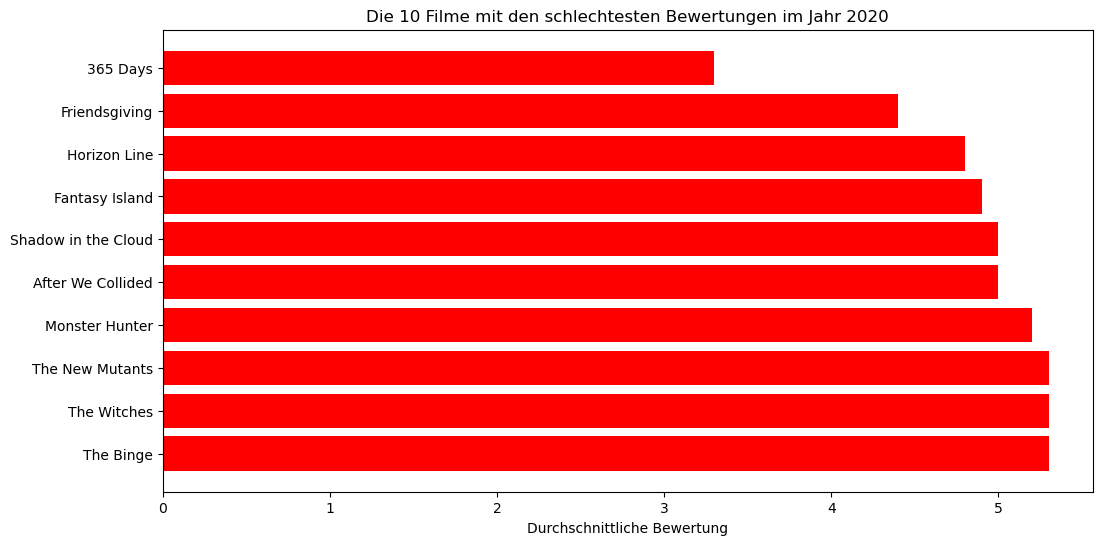

In [21]:
# Erstellen eines Balkendiagramms
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_movies_2020['Title'], bottom_10_movies_2020['Rating'], color='red')
plt.xlabel('Durchschnittliche Bewertung')
plt.title('Die 10 Filme mit den schlechtesten Bewertungen im Jahr 2020')
plt.gca().invert_yaxis()  # Um die Filme mit der schlechtesten Bewertung oben anzuzeigen
plt.show()

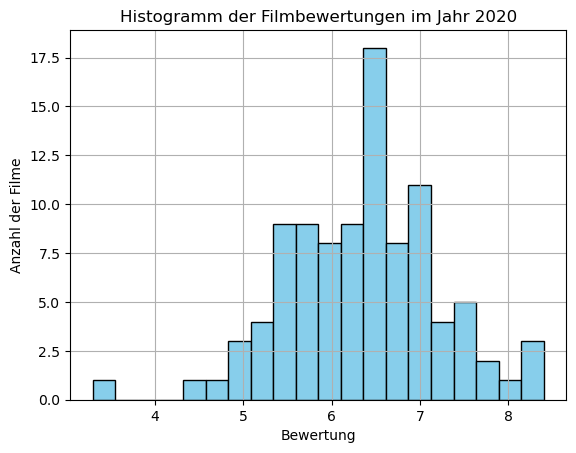

In [22]:
ratings_2020 = df[df['Year'] == 2020]['Rating']
ratings_2020.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramm der Filmbewertungen im Jahr 2020')
plt.xlabel('Bewertung')
plt.ylabel('Anzahl der Filme')
plt.show()

Korrelation zwischen Laufzeit und Bewertung: 0.3785280720080518


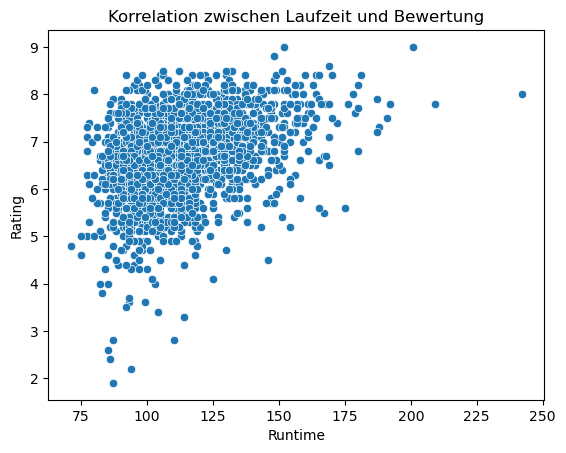

In [23]:
# Konvertiert die 'Runtime'-Spalte in numerische Werte (falls sie nicht bereits numerisch ist)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Prüfung ob dies erfolgreich war 
if pd.api.types.is_numeric_dtype(df['Runtime']):
    #Korrelation berechnen 
    runtime_rating_correlation = df['Runtime'].corr(df['Rating'])

    print(f"Korrelation zwischen Laufzeit und Bewertung: {runtime_rating_correlation}")

    #Visualisierung der Korrelation mit einem Streudiagramm
    sns.scatterplot(x='Runtime', y='Rating', data=df)
    plt.title('Korrelation zwischen Laufzeit und Bewertung')
    plt.show()

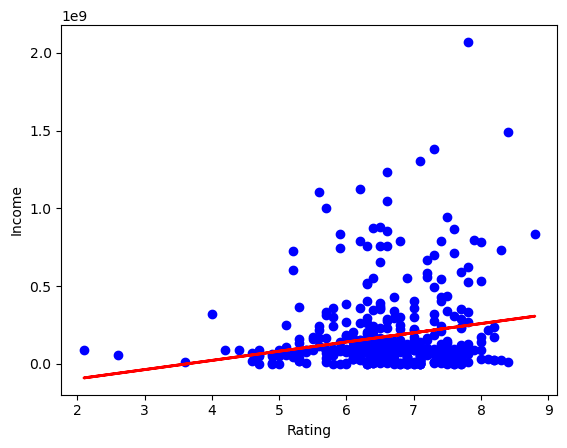

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('movies.csv')

# Bereinigen der 'Income'-Daten
df['Income'] = df['Income'].replace('[\$,]', '', regex=True)
df['Income'] = df['Income'].replace('Unknown', np.nan)
df['Income'] = df['Income'].astype(float)

# Ersetzen von NaN durch den Median in 'Income' ersetzt um Analyse durchführen zu können 
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Entfernen von Zeilen mit NaN-Werten in 'Rating' und 'Income'
df = df.dropna(subset=['Rating', 'Income'])

# Aktualisierung der X und y Variablen mit den bereinigten Daten
X = df[['Rating']]
y = df['Income']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lineare Regression Modell erstellen
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = model.predict(X_test)

# Ergebnisse visualisieren
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Rating')
plt.ylabel('Income')
plt.show()

In [29]:
from sklearn.metrics import r2_score

# Berechnung des Bestimmtheitsmaßes R^2
r2 = r2_score(y_test, y_pred)
print('Das Bestimmtheitsmaß R^2 ist:', r2)

Das Bestimmtheitsmaß R^2 ist: 0.010086121926703773


In [26]:
import numpy as np 

df_2020 = df[df['Year'] == 2020]

# Konvertieren der 'Budget' Spalten in numerische Werte, nicht-numerische werden als NaN behandelt(Not a Number) 
df_2020['Budget'] = pd.to_numeric(df_2020['Budget'].str.replace('[\$\,]', '').replace('Unknown', np.nan), errors='coerce')

durchschnittliches_rating = df_2020['Rating'].mean()

# Ausgabe der Ergebnisse
print("Durchschnittliches Rating im Jahr 2020:", durchschnittliches_rating)


Durchschnittliches Rating im Jahr 2020: 6.35360824742268


C:\Users\monaa\AppData\Local\Temp\ipykernel_16928\2410873065.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2020['Budget'] = pd.to_numeric(df_2020['Budget'].str.replace('[\$\,]', '').replace('Unknown', np.nan), errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16928\2410873065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Budget'] = pd.to_numeric(df_2020['Budget'].str.replace('[\$\,]', '').replace('Unknown', np.nan), errors='coerce')


In [27]:
df = pd.read_csv('movies.csv')

# Sortiert die Daten nach dem Einkommen in absteigender Reihenfolge
df_sorted = df.sort_values(by='Income', ascending=False)

# Wählt den Film mit dem höchsten Einkommen aus (der beliebteste Film)
beliebtester_film = df_sorted.iloc[0] 

#In Pandas ermöglicht die .iloc[] Methode den indexbasierten Zugriff auf Zeilen oder Spalten eines DataFrame. .iloc[0] bedeutet, dass Sie auf die erste Zeile des DataFrame zugreifen. Da df_sorted bereits sortiert ist, entspricht die erste Zeile (iloc[0]) dem Film mit dem höchsten Einkommen

# Gibt Informationen über den beliebtesten Film aus
print(f"Der beliebteste Film ist '{beliebtester_film['Title']}' mit einem Einkommen von {beliebtester_film['Income']} an der Kinokasse.")

Der beliebteste Film ist 'How It Ends' mit einem Einkommen von Unknown an der Kinokasse.


In [30]:
!black "C:\Users\monaa\Desktop\Seminare & Vorlesungen\Projektmanagement ILV\Analysewerkzeuge.Präsentation.csv"

All done! \u2728 \U0001f370 \u2728
1 file left unchanged.
